# 2A.data - DataFrame et Graphes

Les [Dataframe](https://fr.wikipedia.org/wiki/Pandas) se sont imposés pour manipuler les données. Avec cette façon de représenter les données, associée à des méthodes couramment utilisées, ce qu'on faisait en une ou deux boucles se fait maintenant en une seule fonction. Le module [pandas](http://pandas.pydata.org/) est très utilisé, il existe de nombreux [tutoriels](http://pandas.pydata.org/pandas-docs/stable/tutorials.html), ou page de recettes pour les usages les plus fréquents : [cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook).

In [1]:
%matplotlib inline
# Cette première instruction indique à Jupyter d'insérer les graphiques
# dans le notebook plutôt que dans une fenêtre externe.
import matplotlib.pyplot as plt
# Ces deux lignes change le style des graphes.

La première instruction ``%matplotlib`` est spécifique aux notebooks. Sans cela, les graphiques ne sont pas insérées dans la page elle-même mais cela ne s'applique qu'aux notebooks et provoquera une erreur sur [Spyder](https://github.com/spyder-ide/spyder) par exemple.

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

Le module [jyquickhelper](https://pypi.python.org/pypi/jyquickhelper) a été développé pour insérer quelques éléments de [javascript](https://en.wikipedia.org/wiki/JavaScript) dans le notebook de construire automatiquement un menu. Il n'est pas utile en dehors des notebooks. Pour l'installer : ``pip install jyquickhelper``.

## DataFrame

Pour faire court, c'est l'équivalent d'une feuille Excel ou d'une table SQL.

**Taille de DataFrame**

Les DataFrame en Python sont assez rapides lorsqu'il y a moins de 10 millions d'observations et que le fichier texte qui décrit les données n'est pas plus gros que 10 Mo. Au delà, il faut soit être patient, soit être astucieux comme ici : [DataFrame et SQL](http://www.xavierdupre.fr/blog/2014-07-19_nojs.html), [Data Wrangling with Pandas](http://nbviewer.jupyter.org/urls/gist.github.com/fonnesbeck/5850413/raw/3a9406c73365480bc58d5e75bc80f7962243ba17/2.+Data+Wrangling+with+Pandas.ipynb). D'autres options seront proposées plus tard durant ce cours.

**Valeurs manquantes**

Lorsqu'on récupère des données, il peut arriver qu'une valeur soit manquante ([Working with missing data](http://pandas.pydata.org/pandas-docs/dev/missing_data.html)).

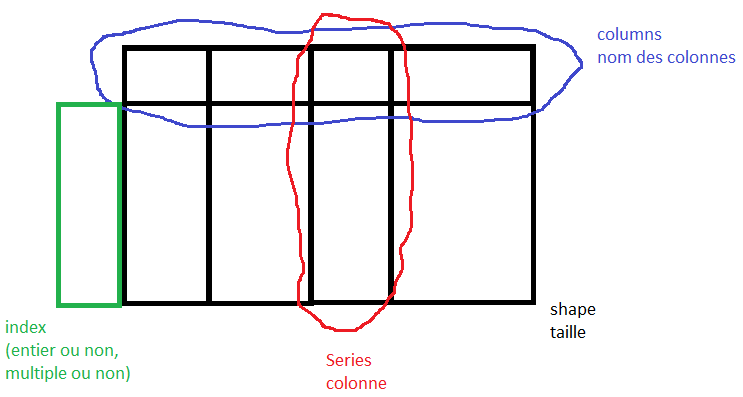

In [3]:
from pyquickhelper.helpgen import NbImage
NbImage("td2df.png")

Pour manipuler les dataframe, on utilise le module [pandas](http://pandas.pydata.org/). Il est prévu pour manipuler les données d'une table par **bloc** (une sous-table). Tant qu'on manipule des blocs, le module est rapide.

### Series

Une [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) est un objet uni-dimensionnel similaire à un tableau, une liste ou une colonne d'une table. Chaque valeur est associée à un **index** qui est par défaut les entiers de 0 à $N-1$ (avec $N$ la longueur de la [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)).

In [4]:
import pandas
from pandas import Series
import numpy
s = Series([42, 'Hello World!', 3.14, -5, None, numpy.nan])
s.head()

0              42
1    Hello World!
2            3.14
3              -5
4            None
dtype: object

On peut aussi préciser les indices lors de la création, ou construire la [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) à partir d'un dictionnaire si on fournit un index avec un dictionnaire, les index qui ne sont pas des clés du dictionnaire seront des valeurs manquantes.

In [5]:
s2 = Series([42, 'Hello World!', 3.14, -5, None, numpy.nan], 
            index=['int', 'string', 'pi', 'neg', 'missing1', 'missing2'])
city2cp_dict = {'Paris14': 75014, 'Paris18': 75018, 'Malakoff': 92240, 'Nice': 6300}
cities = Series(city2cp_dict)
cities

Malakoff    92240
Nice         6300
Paris14     75014
Paris18     75018
dtype: int64

Quelques liens pour comprendre le code suivant : [Series.isnull](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isnull.html), [Series.notnull](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.notnull.html).

In [6]:
cities_list = ['Paris12'] + list(city2cp_dict.keys()) + ['Vanves']
cities2 = Series(city2cp_dict, index=cities_list)
pandas.isnull(cities2) #same as cities2.isnull()
pandas.notnull(cities2)

Paris12     False
Paris14      True
Paris18      True
Malakoff     True
Nice         True
Vanves      False
dtype: bool

On peut se servir de l'index pour sélectionner une ou plusieurs valeurs de la [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html), éventuellement pour en changer la valeur. On peut aussi appliquer des opérations mathématiques, filtrer avec un booléen, ou encore tester la présence d'un élement.

In [7]:
cities2['Nice']                  # renvoie un scalaire
cities2[['Malakoff', 'Paris14']] # renvoie une Series
cities2['Paris12'] = 75012
dep = cities2 // 1000            # // pour une division entière
dep

Paris12     75.0
Paris14     75.0
Paris18     75.0
Malakoff    92.0
Nice         6.0
Vanves       NaN
dtype: float64

[pandas](http://pandas.pydata.org/) aligne automatiquement les données en utilisant l'index des [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) lorsqu'on fait une opération sur des series.

In [8]:
cities2[dep==75]

print("Paris14",'Paris14' in cities2)
print("Paris13",'Paris13' in cities2)

Paris14 True
Paris13 False


In [9]:
#print(cities)
#print(cities2)
cities + cities2

Malakoff    184480.0
Nice         12600.0
Paris12          NaN
Paris14     150028.0
Paris18     150036.0
Vanves           NaN
dtype: float64

*pandas* garde les lignes communes aux deux tables et additionnent les colonnes portant le même nom. On peut nommer la [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html), ses index et même assigner un nouvel index à une [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) existante.

In [10]:
cities2.name = "Code Postal"
cities2.index.name = "Ville"
print(cities2)
print("-------------")
s2.index = range(6)
print(s2)

Ville
Paris12     75012.0
Paris14     75014.0
Paris18     75018.0
Malakoff    92240.0
Nice         6300.0
Vanves          NaN
Name: Code Postal, dtype: float64
-------------
0              42
1    Hello World!
2            3.14
3              -5
4            None
5             NaN
dtype: object


## DataFrame (pandas)

**Quelques liens :** [An Introduction to Pandas](http://synesthesiam.com/posts/an-introduction-to-pandas.html)

Un [DataFrame](http://en.wikipedia.org/wiki/Data_frame) est un objet qui est présent dans la plupart des logiciels de traitements de données, c'est une **matrice**, chaque colonne est une [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) et est de même type (nombre, date, texte), elle peut contenir des valeurs manquantes ([nan](http://docs.scipy.org/doc/numpy/user/misc.html)). On peut considérer chaque colonne comme les variables d'une table ([pandas.Dataframe](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html) - cette page contient toutes les méthodes de la classe).

Un [Dataframe](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html) représente une table de données, i.e. une collection ordonnées de colonnes.
Ces colonnes/lignes peuvent avoir des types différents (numérique, string, boolean).
Cela est très similaire aux [DataFrame](http://www.r-tutor.com/r-introduction/data-frame) du langage R (en apparence...), avec un traitement plus symétrique des lignes et des colonnes.

In [11]:
import pandas
l = [ { "date":"2014-06-22", "prix":220.0, "devise":"euros" }, 
      { "date":"2014-06-23", "prix":221.0, "devise":"euros" },]
df = pandas.DataFrame(l)
df

,date,devise,prix
0,2014-06-22,euros,220.0
1,2014-06-23,euros,221.0


Avec une valeur manquante :

In [12]:
l = [ { "date":"2014-06-22", "prix":220.0, "devise":"euros" }, 
      { "date":"2014-06-23", "devise":"euros"  },]
df = pandas.DataFrame(l)
df

,date,devise,prix
0,2014-06-22,euros,220.0
1,2014-06-23,euros,NaN


[NaN](http://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html#numpy.isnan) est une convention pour une valeur manquante. On extrait la variable ``prix`` :

In [13]:
df.prix

0    220.0
1      NaN
Name: prix, dtype: float64

Ou :

In [14]:
df["prix"]

0    220.0
1      NaN
Name: prix, dtype: float64

Pour extraire plusieurs colonnes :

In [15]:
df[["date","prix"]]

,date,prix
0,2014-06-22,220.0
1,2014-06-23,NaN


Pour prendre la transposée (voir aussi [DataFrame.transpose](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.transpose.html)) :

In [16]:
df.T

,0,1
date,2014-06-22,2014-06-23
devise,euros,euros
prix,220,NaN


### Lecture et écriture de DataFrame

Aujourd'hui, on n'a plus besoin de réécrire soi-même une fonction de lecture ou d'écriture de données présentées sous forme de tables. Il existe des fonctions plus génériques qui gère un grand nombre de cas.
Cette section présente brièvement les fonctions qui permettent de lire/écrire un [DataFrame](http://en.wikipedia.org/wiki/Data_frame) aux formats [texte](http://fr.wikipedia.org/wiki/Fichier_texte)/[Excel](http://fr.wikipedia.org/wiki/Microsoft_Excel). On reprend l'exemple de section précédente. L'instruction ``encoding=utf-8`` n'est pas obligatoire mais conseillée lorsque les données contiennent des accents (voir [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html)).

In [17]:
import pandas
l = [ { "date":"2014-06-22", "prix":220.0, "devise":"euros" }, 
      { "date":"2014-06-23", "prix":221.0, "devise":"euros" },]
df = pandas.DataFrame(l)

# écriture au format texte
df.to_csv("exemple.txt",sep="\t",encoding="utf-8", index=False)

# on regarde ce qui a été enregistré
with open("exemple.txt", "r", encoding="utf-8") as f: 
    text = f.read()
print(text)

# on enregistre au format Excel
df.to_excel("exemple.xlsx", index=False)

# special jupyter - notebook
%system "exemple.xlsx"

date	devise	prix
2014-06-22	euros	220.0
2014-06-23	euros	221.0



[]

On peut récupérer des données directement depuis Internet ou une chaîne de caractères et afficher le début ([head](pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)) ou la fin ([tail](pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html)).

**Aparté :** lire [StringIO](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/all_FAQ.html#a-quoi-sert-un-stringio)
**Données :** [marathon.txt](https://raw.githubusercontent.com/sdpython/ensae_teaching_cs/master/src/ensae_teaching_cs/data/data_1a/marathon.txt).

La fonction [marathon](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/ensae_teaching_cs/data/data1a.html?highlight=marathon#ensae_teaching_cs.data.data1a.marathon) fait partie du module [ensae_teaching_cs](https://pypi.python.org/pypi/ensae_teaching_cs). Ce module n'est pas nécessaire si on télécharge directement les données, il automatise certains opérations qui sans cela seraient manuelles. Pour l'installer ``pip install ensae_teaching_cs``.

In [18]:
from ensae_teaching_cs.data import marathon
import pandas
df = pandas.read_csv(marathon(filename=True), 
                     sep="\t", names=["ville", "annee", "temps","secondes"])
df.head()

,ville,annee,temps,secondes
0,PARIS,2011,02:06:29,7589
1,PARIS,2010,02:06:41,7601
2,PARIS,2009,02:05:47,7547
3,PARIS,2008,02:06:40,7600
4,PARIS,2007,02:07:17,7637


La fonction [describe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) permet d'en savoir un peu plus sur les colonnes numériques de cette table.

In [19]:
df.describe()

,annee,secondes
count,359.000000,359.000000
mean,1989.754875,7933.660167
std,14.028545,385.289830
min,1947.000000,7382.000000
25%,1981.000000,7698.000000
50%,1991.000000,7820.000000
75%,2001.000000,8046.500000
max,2011.000000,10028.000000


### DataFrame et Index

On désigne généralement une colonne ou *variable* par son nom. Les lignes peuvent être désignées par un entier.

In [20]:
import pandas
l = [ { "date":"2014-06-22", "prix":220.0, "devise":"euros" }, 
      { "date":"2014-06-23", "prix":221.0, "devise":"euros" },]
df = pandas.DataFrame(l)
df

,date,devise,prix
0,2014-06-22,euros,220.0
1,2014-06-23,euros,221.0


On extrait une ligne avec ([iloc](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.iloc.html)).

In [21]:
df.iloc[1]

date      2014-06-23
devise         euros
prix             221
Name: 1, dtype: object

On extrait une colonne avec [loc]( ou [iloc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html).

In [22]:
df.loc[1]

date      2014-06-23
devise         euros
prix             221
Name: 1, dtype: object

On extrait une valeur en indiquant sa position dans la table avec des entiers :

In [23]:
df.iloc[1,2]

221.0

Avec [loc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html), il faut préciser le nombre de la colonne.

In [24]:
df.columns

Index(['date', 'devise', 'prix'], dtype='object')

In [25]:
df.loc[1,"prix"]

221.0

Mais il est possible d'utiliser une colonne ou plusieurs colonnes comme index ([set_index](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)) :

In [26]:
dfi = df.set_index("date")
dfi

,devise,prix
date,,
2014-06-22,euros,220.0
2014-06-23,euros,221.0


On peut maintenant désigner une ligne par une date avec [loc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) (mais pas [iloc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) car [iloc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) n'accepte que des entiers qui se réfère aux index de chaque dimension).

In [27]:
dfi.loc["2014-06-23"]

devise    euros
prix        221
Name: 2014-06-23, dtype: object

Il est possible d'utiliser plusieurs colonnes comme [index](http://pandas.pydata.org/pandas-docs/stable/indexing.html) :

In [28]:
df = pandas.DataFrame([ {"prénom":"xavier", "nom":"dupré", "arrondissement":18}, 
       {"prénom":"clémence", "nom":"dupré", "arrondissement":15 } ])
dfi = df.set_index(["nom","prénom"])
dfi.loc["dupré","xavier"]

arrondissement    18
Name: (dupré, xavier), dtype: int64

Si on veut changer l'index ou le supprimer ([reset_index](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)) :

In [29]:
dfi.reset_index(drop=False, inplace=True)  
        # le mot-clé drop pour garder ou non les colonnes servant d'index
        # inplace signifie qu'on modifie l'instance et non qu'une copie est modifiée
        # donc on peut aussi écrire dfi2 = dfi.reset_index(drop=False)  
dfi.set_index(["nom", "arrondissement"],inplace=True)
dfi

prénom
nom   arrondissement          
dupré 18                xavier
      15              clémence

Les index sont particulièrement utiles lorsqu'il s'agit de fusionner deux tables. Pour des petites tables, la plupart du temps, il est plus facile de s'en passer.

### Notation avec le symbole ``:``

Le symbole ``:`` désigne une plage de valeurs.

In [30]:
import pandas, urllib.request
from ensae_teaching_cs.data import marathon
df = pandas.read_csv(marathon(), sep="\t", names=["ville", "annee", "temps","secondes"])
df.head()

,ville,annee,temps,secondes
0,PARIS,2011,02:06:29,7589
1,PARIS,2010,02:06:41,7601
2,PARIS,2009,02:05:47,7547
3,PARIS,2008,02:06:40,7600
4,PARIS,2007,02:07:17,7637


On peut sélectionner un sous-ensemble de lignes :

In [31]:
df[3:6]

,ville,annee,temps,secondes
3,PARIS,2008,02:06:40,7600
4,PARIS,2007,02:07:17,7637
5,PARIS,2006,02:08:03,7683


On extrait la même plage mais avec deux colonnes seulement :

In [32]:
df.loc[3:6,["annee","temps"]]

,annee,temps
3,2008,02:06:40
4,2007,02:07:17
5,2006,02:08:03
6,2005,02:08:02


Le même code pour lequel on renomme les colonnes extraites :

In [33]:
sub = df.loc[3:6,["annee","temps"]]
sub.columns = ["year","time"]
sub

,year,time
3,2008,02:06:40
4,2007,02:07:17
5,2006,02:08:03
6,2005,02:08:02


### Exercice 1 : créer un fichier Excel
    
On souhaite récupérer les données [donnees_enquete_2003_television.txt](http://www.xavierdupre.fr/enseignement/complements/donnees_enquete_2003_television.txt) (source : [INSEE](http://www.insee.fr/fr/themes/detail.asp?ref_id=fd-hdv03&page=fichiers_detail/HDV03/telechargement.htm)).

* ``POIDSLOG`` : Pondération individuelle relative
* ``POIDSF`` : Variable de pondération individuelle
* ``cLT1FREQ`` : Nombre d'heures en moyenne passées à regarder la télévision 
* ``cLT2FREQ`` : Unité de temps utilisée pour compter le nombre d'heures passées à regarder la télévision, cette unité est représentée par les quatre valeurs suivantes
    * 0 : non concerné
    * 1 : jour
    * 2 : semaine
    * 3 : mois 
    
Ensuite, on veut :

1. Supprimer les colonnes vides
2. Obtenir les valeurs distinctes  pour la colonne ``cLT2FREQ``
3. Modifier la matrice pour enlever les lignes pour lesquelles l'unité de temps (cLT2FREQ) n'est pas renseignée ou égale à zéro.
4. Sauver le résultat au format Excel.

Vous aurez peut-être besoin des fonctions suivantes :

* [numpy.isnan](http://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html)
* [DataFrame.apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)
* [DataFrame.fillna](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) ou [DataFrame.isnull](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html) ou [DataFrame.notnull](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.notnull.html)
* [DataFrame.copy](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.copy.html)

In [34]:
import pandas, io
# ...

## Manipuler un DataFrame

Si la structure *DataFrame* s'est imposée, c'est parce qu'on effectue toujours les mêmes opérations. Chaque fonction cache une boucle ou deux dont le coût est précisé en fin de ligne :

- **filter** : on sélectionne un sous-ensemble de lignes qui vérifie une condition $\rightarrow O(n)$
- **union** : concaténation de deux jeux de données $\rightarrow O(n_1 + n_2)$
- **sort** : tri  $\rightarrow O(n \ln n)$
- **group by** : grouper des lignes qui partagent une valeur commune  $\rightarrow O(n)$
- **join** : fusionner deux jeux de données en associant les lignes qui partagent une valeur commune  $\rightarrow \in [O(n_1 + n_2), O(n_1 n_2)]$
- **pivot** : utiliser des valeurs présentes dans colonne comme noms de colonnes $\rightarrow O(n)$

Les 5 premières opérations sont issues de la logique de manipulation des données avec le langage [SQL](http://fr.wikipedia.org/wiki/Structured_Query_Language) (ou le logiciel [SAS](http://www.sas.com)). La dernière correspond à un [tableau croisé dynamique](http://fr.wikipedia.org/wiki/Tableau_crois%C3%A9_dynamique). Pour illustrer ces opérations, on prendre le [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) suivant :

In [35]:
import pandas
from ensae_teaching_cs.data import marathon
filename = marathon()
df = pandas.read_csv(filename, sep="\t", names=["ville", "annee", "temps","secondes"])
print(df.columns)
print("villes",set(df.ville))
print("annee",list(set(df.annee))[:10],"...")

Index(['ville', 'annee', 'temps', 'secondes'], dtype='object')
villes {'FUKUOKA', 'AMSTERDAM', 'CHICAGO', 'BERLIN', 'PARIS', 'LONDON', 'BOSTON', 'NEW YORK', 'STOCKOLM'}
annee [1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956] ...


### 6 opérations : filtrer, union, sort, group by, join, pivot

#### filter

Filter consiste à sélectionner un sous-ensemble de lignes du dataframe. Pour filter sur plusieurs conditions, il faut utiliser les opérateurs logique & (et), | (ou), ~ (non) (voir [Mapping Operators to Functions](https://docs.python.org/3.4/library/operator.html#mapping-operators-to-functions)).

* [filter](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.filter.html), [mask](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mask.html),[where](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.where.html)
* [pandas: filter rows of DataFrame with operator chaining](http://stackoverflow.com/questions/11869910/pandas-filter-rows-of-dataframe-with-operator-chaining)
* [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

In [36]:
subset = df [ df.annee == 1971 ]
subset.head()

,ville,annee,temps,secondes
112,FUKUOKA,1971,02:12:51,7971
204,NEW YORK,1971,02:22:54,8574
285,BOSTON,1971,02:18:45,8325


In [37]:
subset = df [ (df.annee == 1971) & (df.ville == "BOSTON") ]
subset.head()

,ville,annee,temps,secondes
285,BOSTON,1971,02:18:45,8325


Les dernières versions de pandas ont introduit la méthode [query](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html) qui permet de réduire encore l'écriture :

In [38]:
subset = df.query( '(annee == 1971) & (ville == "BOSTON")')
subset.head()

,ville,annee,temps,secondes
285,BOSTON,1971,02:18:45,8325


#### union

union = concaténation de deux [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) (qui n'ont pas nécessairement les mêmes colonnes). On peut concaténer les lignes ou les colonnes.

* [concat](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)
* [Merge, join, and concatenate](http://pandas.pydata.org/pandas-docs/stable/merging.html)

In [39]:
concat_ligne = pandas.concat((df,df))
df.shape,concat_ligne.shape

((359, 4), (718, 4))

In [40]:
concat_col = pandas.concat((df,df), axis=1)
df.shape,concat_col.shape

((359, 4), (359, 8))

#### sort

Sort = trier

* [sort](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

In [41]:
tri = df.sort_values( ["annee", "ville"], ascending=[0,1])
tri.head()

,ville,annee,temps,secondes
35,BERLIN,2011,02:03:38,7418
325,BOSTON,2011,02:03:02,7382
202,LONDON,2011,02:04:40,7480
0,PARIS,2011,02:06:29,7589
276,STOCKOLM,2011,02:14:07,8047


#### group by

Cette opération consiste à grouper les lignes qui partagent une caractéristique commune (une valeur dans une colonne ou plusieurs valeurs dans plusieurs colonnes). On peut conserver chaque groupe, ou calculer une somme, une moyenne, prendre la ou meilleures valeurs (top $k$ per group)...

* [groupby](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)
* [sum](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html), [cumsum](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cumsum.html), [mean](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html), [count](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html)
* [SQL GROUP BY](http://sql.sh/cours/group-by)
* [Group By: split-apply-combine](http://pandas.pydata.org/pandas-docs/dev/groupby.html)
* [group by customisé](http://stackoverflow.com/questions/15322632/python-pandas-df-groupby-agg-column-reference-in-agg)
* [fast way to get index of top-k elements of every column in a pandas dataframe](http://stackoverflow.com/questions/32188867/fast-way-to-get-index-of-top-k-elements-of-every-column-in-a-pandas-dataframe)


In [42]:
gr = df.groupby("annee")
gr

In [43]:
nb = gr.count()
nb.sort_index(ascending=False).head()

,ville,temps,secondes
annee,,,
2011,5,5,5
2010,9,9,9
2009,9,9,9
2008,9,9,9
2007,9,9,9


In [44]:
nb = gr.sum()
nb.sort_index(ascending=False).head(n=2)

,secondes
annee,
2011,37916
2010,68673


In [45]:
nb = gr.mean()
nb.sort_index(ascending=False).head(n=3)

,secondes
annee,
2011,7583.200000
2010,7630.333333
2009,7652.555556


Si les nom des colonnes utilisées lors de l'opération ne sont pas mentionnés, implicitement, c'est l'index qui sera choisi. On peut aussi aggréger les informations avec une fonction personnalisée.

In [46]:
def max_entier(x):
    return int(max(x))
nb = df[["annee","secondes"]].groupby("annee").agg(max_entier).reset_index()
nb.tail(n=3)

,annee,secondes
62,2009,8134
63,2010,7968
64,2011,8047


Ou encore considérer des aggrégations différentes pour chaque colonne :

In [47]:
nb = df[["annee","ville","secondes"]].groupby("annee").agg({ "ville":len, "secondes":max_entier})
nb.tail(n=3)

,ville,secondes
annee,,
2009,9,8134
2010,9,7968
2011,5,8047


On veut extraire les deux meilleurs temps par ville :

In [48]:
series = df.groupby(["ville"]).apply(lambda r: r["secondes"].nsmallest(2))

In [49]:
indices = [t[1] for t in series.index]
indices

[171,
 170,
 35,
 38,
 325,
 324,
 357,
 347,
 74,
 75,
 202,
 200,
 234,
 222,
 2,
 0,
 248,
 251]

In [50]:
df.loc[indices]

,ville,annee,temps,secondes
171,AMSTERDAM,2010,02:05:44,7544
170,AMSTERDAM,2009,02:06:18,7578
35,BERLIN,2011,02:03:38,7418
38,BERLIN,2008,02:03:59,7439
325,BOSTON,2011,02:03:02,7382
324,BOSTON,2010,02:05:52,7552
357,CHICAGO,2009,02:05:41,7541
347,CHICAGO,1999,02:05:42,7542
74,FUKUOKA,2009,02:05:18,7518
75,FUKUOKA,2008,02:06:10,7570


#### join (_merge_ ou fusion)

Fusionner deux tables consiste à apparier les lignes de la première table avec celle de la seconde si certaines colonnes de ces lignes partagent les mêmes valeurs. On distingue quatre cas :

* ``INNER JOIN`` - **inner** : on garde tous les appariements réussis 
* ``LEFT OUTER JOIN`` - **left** : on garde tous les appariements réussis et les lignes non appariées de la table de gauche
* ``RIGHT OUTER JOIN`` - **right** : on garde tous les appariements réussis et les lignes non appariées de la table de droite
* ``FULL OUTER JOIN`` - **outer** : on garde tous les appariements réussis et les lignes non appariées des deux tables

Exemples et documentation :
* [merging, joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging)
* [join](http://pandas.pydata.org/pandas-docs/stable/pandas.DataFrame.join.html)
* [merge](http://pandas.pydata.org/pandas-docs/stable/pandas.merge.html) ou [DataFrame.merge](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)
* [jointures SQL](http://sql.sh/cours/jointures) - illustrations avec graphiques en patates

Si les noms des colonnes utilisées lors de la fusion ne sont pas mentionnés, implicitement, c'est l'index qui sera choisi. Pour les grandes tables (> 1.000.000 lignes), il est fortement recommandé d'ajouter un index s'il n'existe pas avant de fusionner. **A quoi correspondent les quatre cas suivants (LEFT ou FULL ou RIGHT ou INNER) ?**

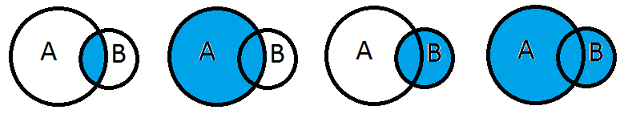

In [51]:
from IPython.display import Image
Image("patates.png")

On souhaite ajouter une colonne pays aux marathons se déroulant dans les villes suivantes.

In [52]:
values = [  {"V":'BOSTON', "C":"USA"}, 
            {"V":'NEW YORK', "C":"USA"}, 
            {"V":'BERLIN', "C":"Germany"}, 
            {"V":'LONDON', "C":"UK"}, 
            {"V":'PARIS', "C":"France"}]
pays = pandas.DataFrame(values)
pays

,C,V
0,USA,BOSTON
1,USA,NEW YORK
2,Germany,BERLIN
3,UK,LONDON
4,France,PARIS


In [53]:
dfavecpays = df.merge(pays, left_on="ville", right_on="V")
pandas.concat([dfavecpays.head(n=2),dfavecpays.tail(n=2)])

,ville,annee,temps,secondes,C,V
0,PARIS,2011,02:06:29,7589,France,PARIS
1,PARIS,2010,02:06:41,7601,France,PARIS
192,BOSTON,2010,02:05:52,7552,USA,BOSTON
193,BOSTON,2011,02:03:02,7382,USA,BOSTON


**Question :** 

* **Que changerait l'ajout du paramètre ``how='outer'`` dans ce cas ?**
* **On cherche à joindre deux tables A,B qui ont chacune trois clés distinctes : $c_1, c_2, c_3$. Il y a respectivement dans chaque table $A_i$ et $B_i$ lignes pour la clé $c_i$. Combien la table finale issue de la fusion des deux tables contiendra-t-elle de lignes ?**

#### pivot (tableau croisé dynamique)

Cette opération consiste à créer une seconde table en utilisant utiliser les valeurs d'une colonne comme nom de colonnes. 

| A | B | C |
| --- | --- | --- |
| A1 | B1 | C1 |
| A1 | B2 | C2 |
| A2 | B1 | C3 |
| A2 | B2 | C4 |
| A2 | B3 | C5 |

L'opération ``pivot(A,B,C)`` donnera :

| A | B1 | B2 | B3 |
| --- | --- | --- | --- |
| A1 | C1 | C2 |  |
| A2 | C3 | C4 | C5 |

* [pivot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html), [pivot_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.tools.pivot.pivot_table.html)
* [Reshaping and Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html)
* [Tableau croisé dynamique - wikipédia](http://fr.wikipedia.org/wiki/Tableau_crois%C3%A9_dynamique)

On applique cela aux marathons où on veut avoir les villes comme noms de colonnes et une année par ligne.

In [54]:
piv = df.pivot("annee","ville","temps")
pandas.concat([piv[20:23],piv[40:43],piv.tail(n=3)])

ville,AMSTERDAM,BERLIN,BOSTON,CHICAGO,FUKUOKA,LONDON,NEW YORK,PARIS,STOCKOLM
annee,,,,,,,,,
1967,None,None,02:15:45,None,02:09:37,None,None,None,None
1968,None,None,02:22:17,None,02:10:48,None,None,None,None
1969,None,None,02:13:49,None,02:11:13,None,None,None,None
1987,02:12:40,02:11:11,02:11:50,None,02:08:18,02:09:50,02:11:01,02:11:09,02:13:52
1988,02:12:38,02:11:45,02:08:43,02:08:57,02:11:04,02:10:20,02:08:20,02:13:53,02:14:26
1989,02:13:52,02:10:11,02:09:06,02:11:25,02:12:54,02:09:03,02:08:01,02:13:03,02:13:34
2009,02:06:18,02:06:08,02:08:42,02:05:41,02:05:18,02:05:10,02:09:15,02:05:47,02:15:34
2010,02:05:44,02:05:08,02:05:52,02:06:23,02:08:24,02:05:19,02:08:14,02:06:41,02:12:48
2011,None,02:03:38,02:03:02,None,None,02:04:40,None,02:06:29,02:14:07


Il existe une méthode qui effectue l'opération inverse : [Dataframe.stack](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.stack.html).

### Lambda fonctions

Les [lambda expressions](https://docs.python.org/3.4/tutorial/controlflow.html#lambda-expressions) permettent une syntaxe plus légère (syntactic sugar) pour déclarer une fonction simple.
Cela est très utile pour passer une fonction en argument notamment. 
Par exemple pour trier sur le 2ème element d'un tuple.

In [55]:
pairs = [(1, 'one'), (2, 'two'), (3, 'three'), (4, 'four')]
pairs.sort(key=lambda pair: pair[1])
print(pairs)

[(4, 'four'), (1, 'one'), (3, 'three'), (2, 'two')]


On peut réécrire le groupby aggrégé par ``max_entier`` en utilisant une fonction lambda

In [56]:
def max_entier(x):
    return int(max(x))
nb = df[["annee","secondes"]].groupby("annee").agg(max_entier).reset_index()
nb.tail(n=3)
#same as:
nb = df[["annee","secondes"]].groupby("annee").agg(lambda x: int(max(x))).reset_index()
nb.tail(n=3)

,annee,secondes
62,2009,8134
63,2010,7968
64,2011,8047


### Exercice 2 : lambda fonction

Ecrire une lambda fonction qui prend deux paramètres et qui est équivalente à la fonction suivante :

In [57]:
def delta(x,y):
    return max(x,y)- min(x,y)

On utilise beaucoup les lambda fonctions lorsqu'une fonction prend une fonction en argument :

In [58]:
def riemann (a,b,f,n):
    return sum (  f(a + (b-a)*i/n) for i in range(0,n) ) / n
riemann(0,1, lambda x : x**2, 1000)

0.3328334999999999

Ensuite, il faut utiliser une lambda fonction et la fonction [apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) pour tirer un échantillon aléatoire

### Exercice 3 : moyennes par groupes
    
Toujours avec le même jeu de données ([marathon.txt](http://www.xavierdupre.fr/enseignement/complements/marathon.txt)), on veut ajouter une ligne à la fin du tableau croisé dynamique contenant la moyenne en secondes des temps des marathons pour chaque ville.

### Avec ou sans index

Une façon naïve de faire une jointure entre deux tables de taille $m$ et $n$ et de regarder toutes les $mn$ combinaisons possibles. La taille de la table résultante dépend du type de jointure (``inner``, ``outer``) et de l'unicité des clés utilisées pour la jointure. Si les clés sont uniques, la table finale aura au plus $m+n$ lignes (une par clé).

Dans la plupart des cas, $O(mn)$ opérations est beaucoup trop long. On peut faire plus rapide en triant chacune des tables d'abord et en les fusionnant : $O(n \ln n) + O(m \ln m) + O(n+m)$. Si $m=n$, il est évident que cette façon de faire est plus rapide. C'est une des choses que fait [pandas (présentation)](http://fr.slideshare.net/wesm/a-look-at-pandas-design-and-development) (voir aussi [klib](https://github.com/attractivechaos/klib)). 

On peut trier une table selon une clé ou encore utiliser une [table de hachage](http://fr.wikipedia.org/wiki/Table_de_hachage)), il est alors très rapide de retrouver la ligne ou les lignes qui partagent cette clé. On dit que la table est **indexée** selon cette clé. Indexer selon une ou plusieurs colonnes une table accélère toute opération s'appuyant sur ces colonnes comme la recherche d'un élément.

On veut comparer le temps nécessaire pour une recherche. Pour cela on utilise la ``%magic`` function ``%timeit`` (ou ``%%timeit`` si on veut l'[appliquer à la cellule](http://nbviewer.jupyter.org/github/jupyter/jupyter/blob/1.x/examples/notebooks/Cell%20Magics.ipynb)) de Jupyter.

In [60]:
import pandas, random
big_df = pandas.DataFrame(  {"cle1": random.randint(1,100), 
                             "cle2": random.randint(1,100), 
                             "autre":random.randint(1,10) } for  i in range(0,100000) )
big_df.shape

(100000, 3)

In [61]:
%timeit big_df[(big_df.cle1 == 1) & (big_df.cle2 == 1)]

1.07 ms ± 77.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Et la version indexée :

In [62]:
big_dfi = big_df.set_index(["cle1", "cle2"])
big_dfi = big_dfi.sort_index()  # Il ne faut oublier de trier.
%timeit big_dfi.loc[(1,1), :]

374 µs ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [63]:
big_dfi.head()

autre
cle1 cle2       
1    1         6
     1         1
     1         2
     1        10
     1         5

**Plus la table est grande, plus le gain est important.**

### Dates

Les dates sont souvent compliquées à gérer car on n'utilise pas le mêmes format dans tous les pays. Pour faire simple, je recommande deux options :

* Soit convertir les dates/heures au format chaînes de caractères ``AAAA-MM-JJ hh:mm:ss:ms`` qui permet de trier les dates par ordre croissant.
* Soit convertir les dates/heures au format [datetime](https://docs.python.org/3/library/datetime.html) (date) ou [timedelta](https://docs.python.org/3/library/datetime.html#timedelta-objects) (durée) (voir [Quelques notions sur les dates](http://www.xavierdupre.fr/blog/notebooks/example%20pyensae.html#date), [format de date/heure](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior)).

Par exemple, voici le code qui a permis de générer la colonne seconde de la table marathon :

In [64]:
from datetime import datetime, time
df = pandas.read_csv(marathon(), sep="\t", names=["ville", "annee", "temps","secondes"])
df = df [["ville", "annee", "temps"]]  # on enlève la colonne secondes pour la recréer
df["secondes"] = df.apply( lambda r : (datetime.strptime(r.temps,"%H:%M:%S") - \
                                         datetime(1900,1,1)).total_seconds(), axis=1)
df.head()

,ville,annee,temps,secondes
0,PARIS,2011,02:06:29,7589.0
1,PARIS,2010,02:06:41,7601.0
2,PARIS,2009,02:05:47,7547.0
3,PARIS,2008,02:06:40,7600.0
4,PARIS,2007,02:07:17,7637.0


## Plot(s)

### Récupération des données

On récupère les données disponibles sur le site de l'INSEE : [Naissance, décès, mariages 2012](http://www.insee.fr/fr/themes/detail.asp?ref_id=fd-etatcivil2012&page=fichiers_detail/etatcivil2012/doc/documentation.htm). Il s'agit de récupérer la liste des mariages de l'année 2012. On souhaite représenter le graphe du nombre de mariages en fonction de l'écart entre les mariés.

In [65]:
import urllib.request
import zipfile
import http.client

def download_and_save(name, root_url):
    try:
        response = urllib.request.urlopen(root_url+name)
    except (TimeoutError, urllib.request.URLError, http.client.BadStatusLine):
        # back up plan
        root_url = "http://www.xavierdupre.fr/enseignement/complements/"
        response = urllib.request.urlopen(root_url+name)
    with open(name, "wb") as outfile:
        outfile.write(response.read())

def unzip(name):
    with zipfile.ZipFile(name, "r") as z:
        z.extractall(".")

filenames = ["etatcivil2012_mar2012_dbase.zip", 
             "etatcivil2012_nais2012_dbase.zip",
             "etatcivil2012_dec2012_dbase.zip", ]
root_url = 'http://telechargement.insee.fr/fichiersdetail/etatcivil2012/dbase/'

for filename in filenames:
    download_and_save(filename, root_url)
    unzip(filename)
    print("Download of {}: DONE!".format(filename))

Download of etatcivil2012_mar2012_dbase.zip: DONE!
Download of etatcivil2012_nais2012_dbase.zip: DONE!
Download of etatcivil2012_dec2012_dbase.zip: DONE!


L'exemple suivant pourrait ne pas marcher si le module [dbfread](https://github.com/olemb/dbfread/) n'est pas installé. Si tel est le cas, le programme utilisera une version des données après utilisation de ce module.

In [66]:
import pandas
try:
    from dbfread import DBF
    use_dbfread = True
except ImportError as e :
    use_dbfread = False
    
if use_dbfread:
    print("use of dbfread")
    def dBase2df(dbase_filename):
        table = DBF(dbase_filename, load=True, encoding="cp437")
        return pandas.DataFrame(table.records)

    df = dBase2df('mar2012.dbf')
    #df.to_csv("mar2012.txt", sep="\t", encoding="utf8", index=False)
else :
    print("use of zipped version")
    import pyensae
    data = pyensae.download_data("mar2012.zip")
    df = pandas.read_csv(data[0], sep="\t", encoding="utf8", low_memory = False)    
    
df.shape, df.columns

use of dbfread


((246123, 16),
 Index(['ANAISH', 'DEPNAISH', 'INDNATH', 'ETAMATH', 'ANAISF', 'DEPNAISF',
        'INDNATF', 'ETAMATF', 'AMAR', 'MMAR', 'JSEMAINE', 'DEPMAR', 'DEPDOM',
        'TUDOM', 'TUCOM', 'NBENFCOM'],
       dtype='object'))

L'[encoding](http://fr.wikipedia.org/wiki/Codage_des_caract%C3%A8res) est une façon de représenter les caractères spéciaux (comme les caractères accentuées). L'encoding le plus répandu est ``utf-8``. Sans la mention ``encoding="cp437"``, la fonction qui lit le fichier fait des erreurs lors de la lecture car elle ne sait pas comment interpréter certains caractères spéciaux. On récupère de la même manière la signification des variables :

In [67]:
vardf = dBase2df("varlist_mariages.dbf")
print(vardf.shape, vardf.columns)
vardf

(16, 4) Index(['VARIABLE', 'LIBELLE', 'TYPE', 'LONGUEUR'], dtype='object')


,VARIABLE,LIBELLE,TYPE,LONGUEUR
0,AMAR,Année du mariage,CHAR,4
1,ANAISF,Année de naissance de l'épouse,CHAR,4
2,ANAISH,Année de naissance de l'époux,CHAR,4
3,DEPDOM,Département de domicile après le mariage,CHAR,3
4,DEPMAR,Département de mariage,CHAR,3
5,DEPNAISF,Département de naissance de l'épouse,CHAR,3
6,DEPNAISH,Département de naissance de l'époux,CHAR,3
7,ETAMATF,État matrimonial antérieur de l'épouse,CHAR,1
8,ETAMATH,État matrimonial antérieur de l'époux,CHAR,1
9,INDNATF,Indicateur de nationalité de l'épouse,CHAR,1


### Exercice 4 : nuage de points

On veut tracer un nuage de points avec en abscisse l'âge du mari, en ordonnée, l'âge de la femme. Il faudra peut-être jeter un coup d'oeil sur la documentation de la méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html). Etant donné le nombre d'observations, ce graphe risque d'être moins lisible qu'une [heatmap](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-hexbin).

In [68]:
df.plot(...)

### Exercice 5 : graphe d'une distribution avec pandas

En ajoutant une colonne et en utilisant l'opération [group by](http://pandas.pydata.org/pandas-docs/stable/groupby.html), on veut obtenir la distribution du nombre de mariages en fonction de l'écart entre les mariés. Au besoin, on changera le type d'une colone ou deux. Le module ``pandas`` propose un panel de graphiques standard faciles à obtenir. On souhaite représenter la distribution sous forme d'histogramme. A vous de choisir le meilleure graphique depuis la page [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

In [69]:
df["colonne"] = df.apply (lambda r:  int(r["colonne"]), axis=1)  # pour changer de type
df["difference"] = ...

### matplotlib

[matplotlib](http://matplotlib.org/) est le module qu'utilise [pandas](http://pandas.pydata.org/). Ainsi, la méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) retourne un objet de type [Axes](http://matplotlib.org/api/axes_api.html#module-matplotlib.axes) qu'on peut modifier par la suite via les [méthodes suivantes](http://matplotlib.org/api/pyplot_summary.html). On peut ajouter un titre avec [set_title](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_title) ou ajouter une grille avec [grid](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.grid). On peut également superposer [deux courbes sur le même graphique](http://stackoverflow.com/questions/19941685/how-to-show-a-bar-and-line-graph-on-the-same-plot), ou [changer de taille de caractères](http://stackoverflow.com/questions/12444716/how-do-i-set-figure-title-and-axes-labels-font-size-in-matplotlib). Le code suivant trace le nombre de mariages par département.

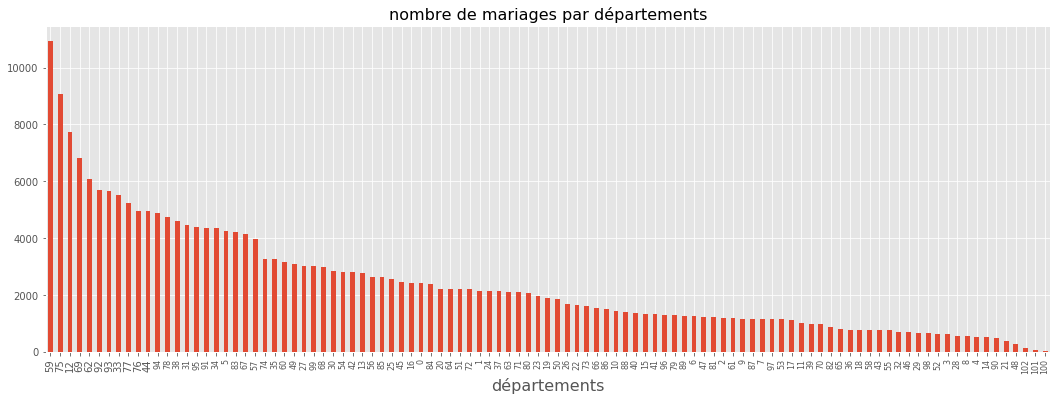

In [70]:
df["nb"] = 1
dep = df[["DEPMAR","nb"]].groupby("DEPMAR", as_index=False).sum().sort_values("nb",ascending=False)
ax = dep.plot(kind = "bar", figsize=(18,6))
ax.set_xlabel("départements", fontsize=16)
ax.set_title("nombre de mariages par départements", fontsize=16)
ax.legend().set_visible(False)  # on supprime la légende

# on change la taille de police de certains labels
for i,tick in enumerate(ax.xaxis.get_major_ticks()):
    if i > 10 :
        tick.label.set_fontsize(8) 

Quand on ne sait pas, le plus simple est d'utiliser un moteur de recherche avec un requête du type : ``matplotlib + requête``. Pour créer un graphique, le plus courant est de choisir le graphique le plus ressemblant d'une [gallerie de graphes](http://matplotlib.org/gallery.html) puis de l'adapter à vos données. On peut aussi changer le [style](http://matplotlib.org/users/style_sheets.html) des graphes. Un style populaire est celui de [ggplot2](http://www.statmethods.net/advgraphs/ggplot2.html) :

In [71]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Exercice 6 : distribution des mariages par jour
    
On veut obtenir un graphe qui contient l'histogramme de la distribution du nombre de mariages par jour de la semaine et d'ajouter une seconde courbe correspond avec un second axe à la répartition cumulée.


## Annexes


### Créer un fichier Excel avec plusieurs feuilles

La page [Allow ExcelWriter() to add sheets to existing workbook](https://github.com/pydata/pandas/issues/3441) donne plusieurs exemples d'écriture. On diminue la taille du document Excel à écrire.

In [73]:
df1000 = df[:1000]

In [74]:
import pandas
writer = pandas.ExcelWriter('ton_example100.xlsx')
df1000.to_excel(writer, 'Data 0')
df1000.to_excel(writer, 'Data 1')
writer.save()

**FIN**